### Import Dependencies

In [70]:
import quandl

import numpy as np
import pandas as pd
import seaborn as sns

from IPython import display
from matplotlib import style
from matplotlib import pyplot as plt
from scipy import optimize as opt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.2f}".format
style.use('fivethirtyeight')
np.random.seed(42)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### API

In [85]:
with open('../../auth.txt') as my_api:
    key = my_api.read()

key = key.split('\n')
key = key[0]

quandl.ApiConfig.api_key = key

### Load Data

In [116]:
tickers = ['IBM', 'AAPL', 'GOOG', 'MSFT']

data = quandl.get_table(
    'WIKI/PRICES',
    ticker = tickers,
    qopts = {'columns': ['date', 'ticker', 'adj_close']},
    date = {'gte': '2015-1-1', 'lte': '2017-12-31'},
    paginate=True)

dataframe = data.set_index('date')
dataframe = dataframe.pivot(columns='ticker')
print("{}\n".format(dataframe.columns))
dataframe.columns = [col[1] for col in dataframe.columns]
print("{}".format(dataframe.columns))
dataframe = pd.DataFrame(dataframe)
dataframe = dataframe.dropna()
display.display(dataframe.head(10))

MultiIndex(levels=[['adj_close'], ['AAPL', 'GOOG', 'IBM', 'MSFT']],
           labels=[[0, 0, 0, 0], [0, 1, 2, 3]],
           names=[None, 'ticker'])

Index(['AAPL', 'GOOG', 'IBM', 'MSFT'], dtype='object')


,AAPL,GOOG,IBM,MSFT
date,,,,
2015-01-02,103.86,524.81,145.53,43.34
2015-01-05,100.94,513.87,143.24,42.94
2015-01-06,100.95,501.96,140.15,42.32
2015-01-07,102.36,501.10,139.24,42.85
2015-01-08,106.30,502.68,142.26,44.11
2015-01-09,106.41,496.17,142.88,43.74
2015-01-12,103.79,492.55,140.48,43.20
2015-01-13,104.71,496.18,140.82,42.97
2015-01-14,104.31,500.87,139.91,42.60


## Plot the Stocks and Compare

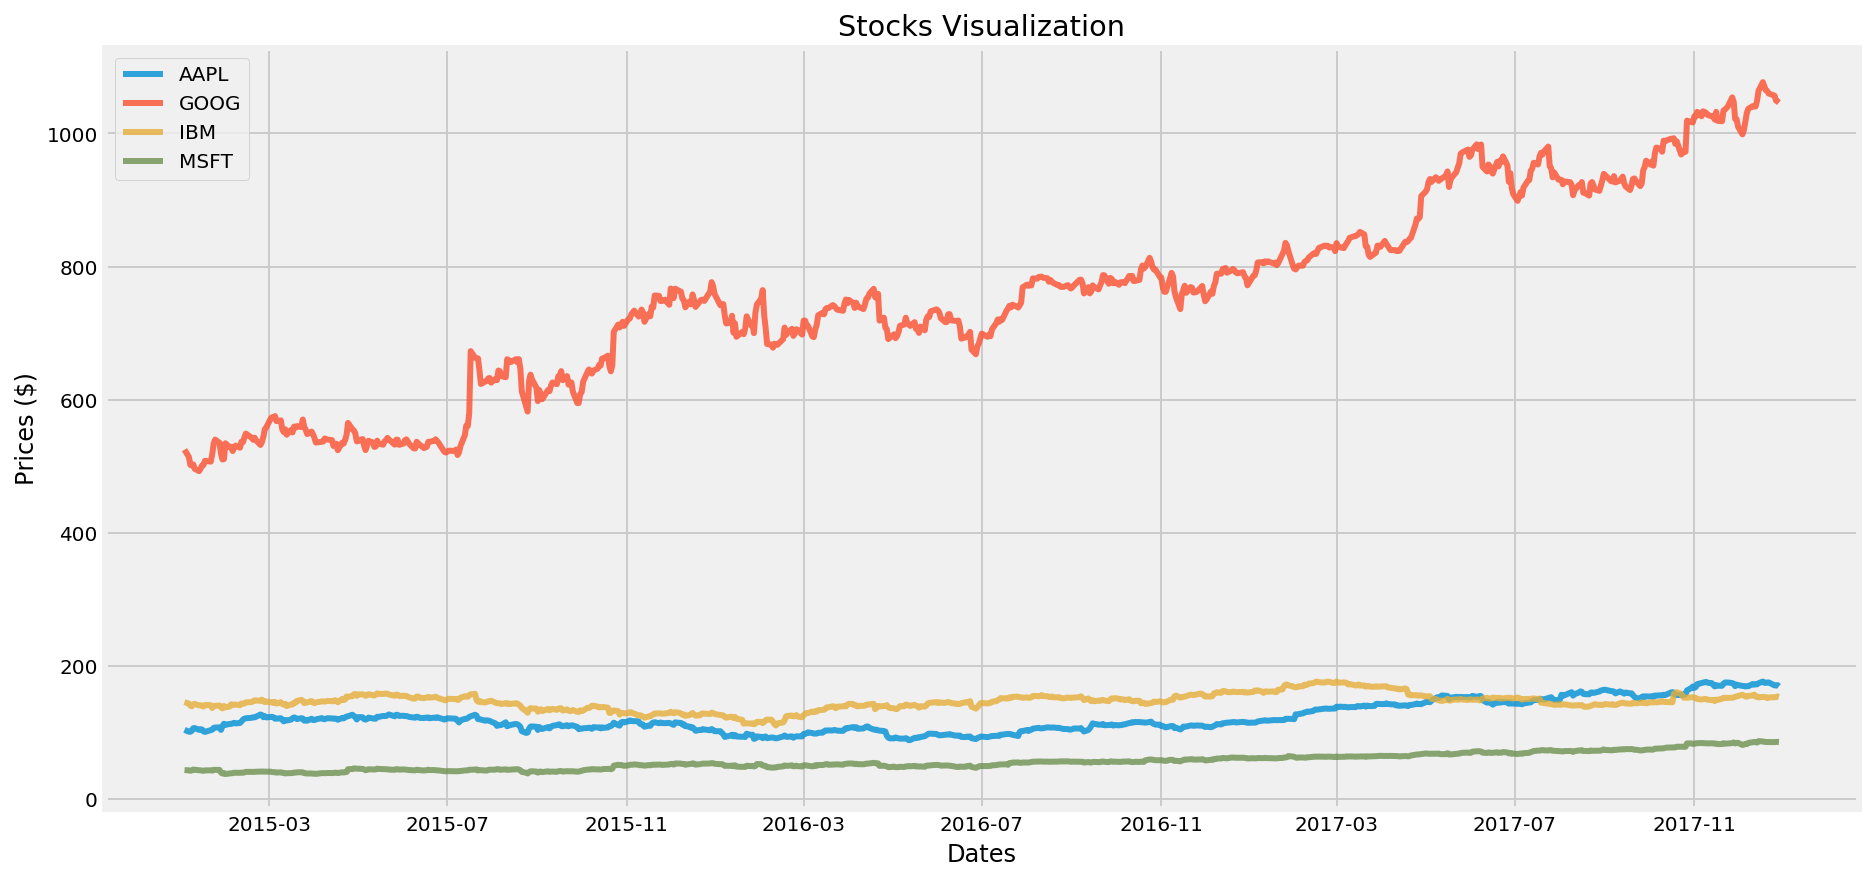

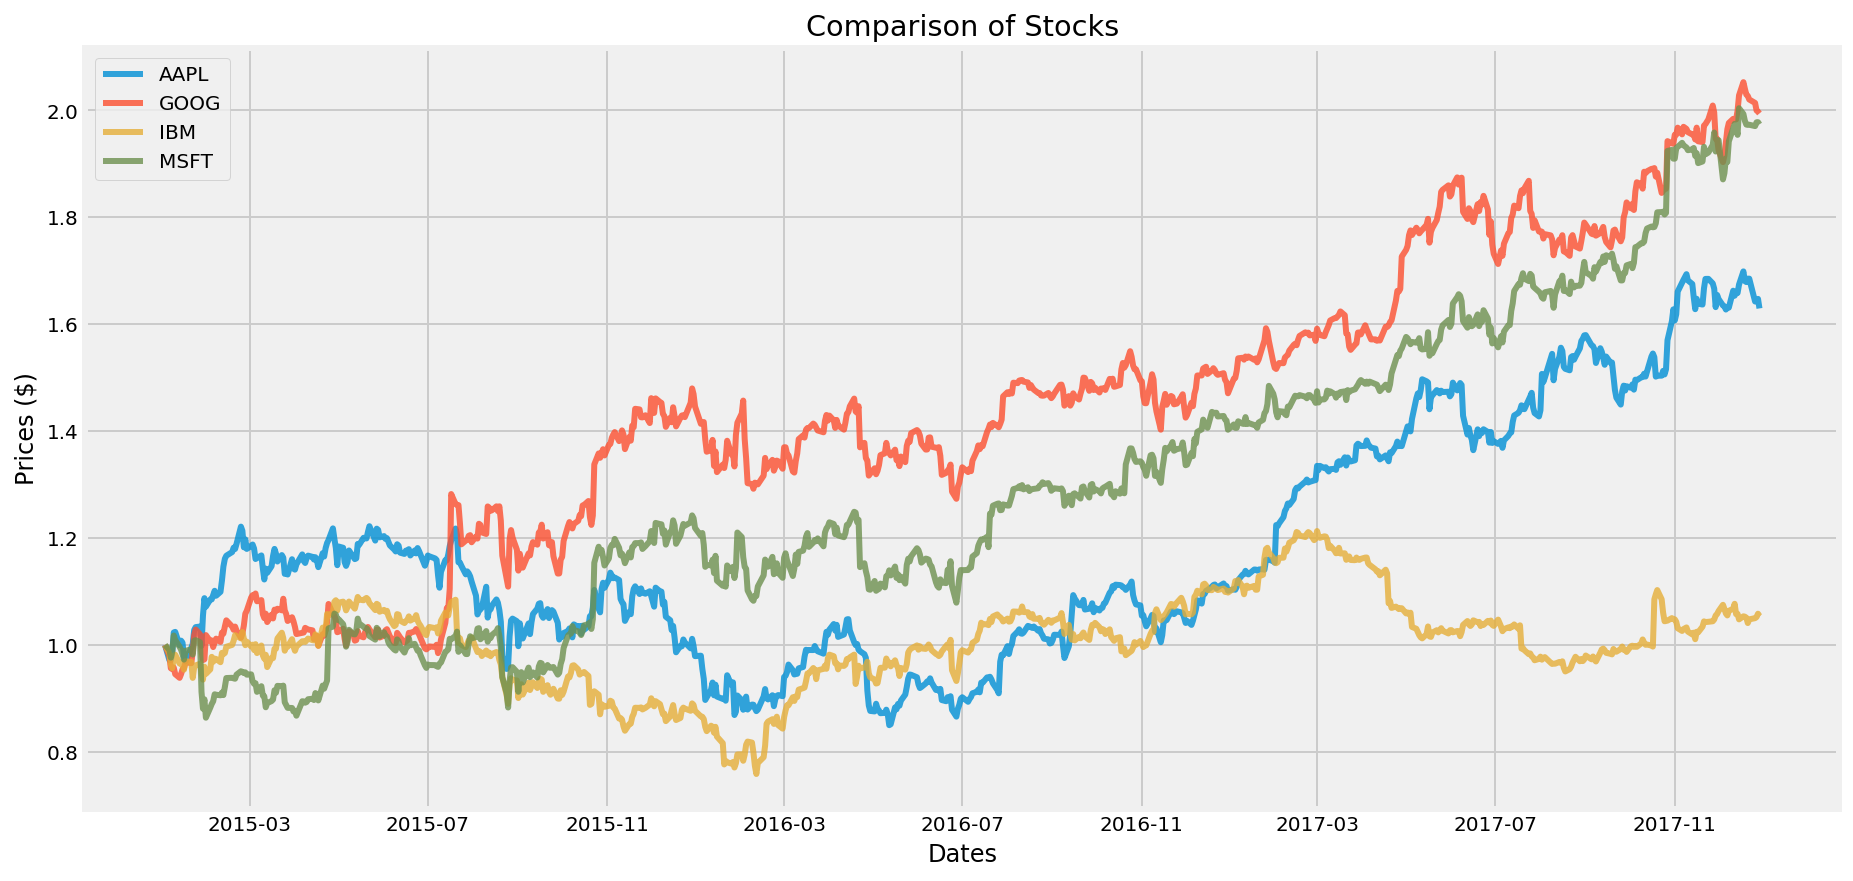

In [121]:
plt.figure(figsize=(14, 7))
for val in dataframe.columns.values:
    plt.plot(
        dataframe.index,
        dataframe[val],
        linewidth=3,
        alpha=0.8,
        label=val)

plt.title('Stocks Visualization')
plt.xlabel('Dates')
plt.ylabel('Prices ($)')
plt.legend()
plt.show()

compare_data = (dataframe / dataframe.iloc[0, :])
plt.figure(figsize=(14, 7))
for val in compare_data.columns.values:
    plt.plot(
        compare_data.index,
        compare_data[val],
        linewidth=3,
        alpha=0.8,
        label=val)
plt.title('Comparison of Stocks')
plt.xlabel('Dates')
plt.ylabel('Prices ($)')
plt.legend()
plt.show()

### Plot the Returns

,AAPL,GOOG,IBM,MSFT
date,,,,
2015-01-02,0.00,0.00,0.00,0.00
2015-01-05,-0.03,-0.02,-0.02,-0.01
2015-01-06,0.00,-0.02,-0.02,-0.01
2015-01-07,0.01,-0.00,-0.01,0.01
2015-01-08,0.04,0.00,0.02,0.03
2015-01-09,0.00,-0.01,0.00,-0.01
2015-01-12,-0.02,-0.01,-0.02,-0.01
2015-01-13,0.01,0.01,0.00,-0.01
2015-01-14,-0.00,0.01,-0.01,-0.01


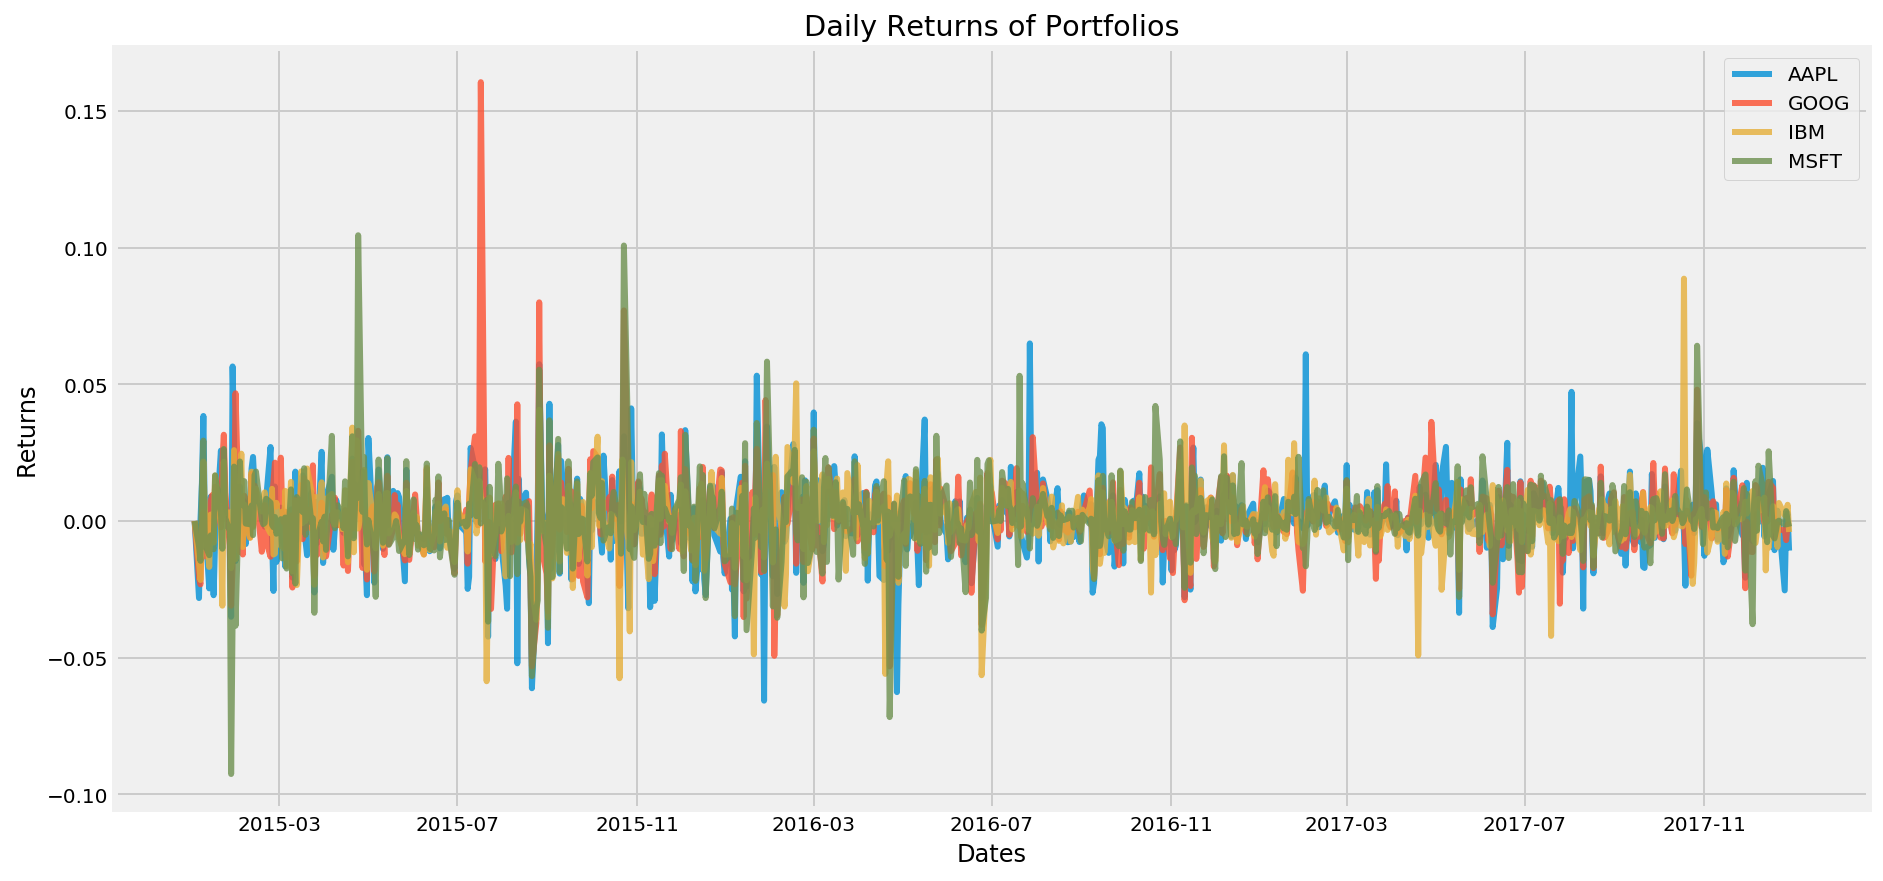

In [118]:
returns = (dataframe / dataframe.shift(1)) - 1  # Caluculates daily returns
returns.iloc[0, :] = 0                          # replaces nan with 0.00
display.display(returns.head(10))

plt.figure(figsize=(14, 7))
for val in returns.columns.values:
    plt.plot(
        returns.index,
        returns[val],
        linewidth=3,
        alpha=0.8,
        label=val)

plt.title('Daily Returns of Portfolios')
plt.ylabel('Returns')
plt.xlabel('Dates')
plt.legend()
plt.show()